In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df=pd.read_csv("outputd0315.csv")
print(df)

           Date      Time  average insect count   Class  \
0    2023-04-27  18:30:00              4.571429  OSMACO   
1    2023-04-27  18:40:00              4.009615  OSMACO   
2    2023-04-27  18:50:00              2.469526  OSMACO   
3    2023-04-27  19:00:00              2.574742  OSMACO   
4    2023-04-27  19:10:00              3.038168  OSMACO   
..          ...       ...                   ...     ...   
608  2023-06-01  15:00:00              0.901961  OSMACO   
609  2023-06-01  15:10:00              0.759259  OSMACO   
610  2023-06-01  15:20:00              0.125000  OSMACO   
611  2023-06-01  12:50:00              0.960265  OSMACO   
612  2023-06-01  10:20:00              0.732673  OSMACO   

     Dew Point, *C, WEASN17 Osmia 2023  Gust Speed, m/s, WEASN17 Osmia 2023  \
0                                8.667                                 0.00   
1                                8.208                                 0.00   
2                                7.781                

In [4]:
X=df.iloc[:,4:11] #environmental features attributes
X.drop(columns=['Rain, mm, WEASN17 Osmia 2023 Precipitation'], inplace=True) 

y=df.iloc[:, 2].values   #average insect count

In [5]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_X = LabelEncoder()


In [6]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [7]:
#Train the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
#the y_pred is a numpy array that contains all the predicted values
y_test=np.abs(y_test)
y_pred=np.abs(y_pred)
output_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print("Actual vs predicted: \n",output_df)

import pandas as pd

# Assuming your DataFrame is named 'df' and the column you want to convert is named 'actual_column'


Actual vs predicted: 
        Actual  Predicted
0    2.479290   3.304280
1    1.197183   0.702257
2    2.017825   3.213804
3    1.672269   2.256134
4    4.162963   2.712242
..        ...        ...
118  1.024390   1.957057
119  1.415842   2.296172
120  3.382022   2.687829
121  1.990272   2.369318
122  2.994475   2.233370

[123 rows x 2 columns]


In [8]:
import numpy as np
from sklearn import metrics 
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
mean_squared_log_error=metrics.mean_squared_log_error(y_test,y_pred)
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
median_absolute_error=metrics.median_absolute_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)

In [9]:
print('Explained Variance: ',explained_variance)
print("mean_absolute_error: ", mean_absolute_error)
print("mean_squared_log_error: ",mean_squared_log_error)
print("R-squared: ",r2)
print("mean_squared_error: ",mean_squared_error)
print("Root Mean Squared Error: ",np.sqrt(mse))

Explained Variance:  0.1685845246227452
mean_absolute_error:  1.059872132346857
mean_squared_log_error:  0.12895186640847428
R-squared:  0.14784719557786796
mean_squared_error:  1.9902511257471924
Root Mean Squared Error:  1.4107626043198027


In [25]:
import numpy as np
import statsmodels.api as sm

# Convert X to a NumPy array if needed
X = np.array(X)

# Add a constant column to X
Y = sm.add_constant(y)

# Fit the OLS model and print the summary
model = sm.OLS(y_pred, y)
results = model.fit()
print(results.summary())


ValueError: endog and exog matrices are different sizes

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have the training features 'X_train' and corresponding target variable 'y_train'
# Assuming you have the test features 'X_test' and corresponding target variable 'y_test'

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
accuracy = 1 - r2_score(y_test, y_pred)
print("Accuracy (R-squared):",accuracy)


Accuracy (R-squared): 0.852152804422132


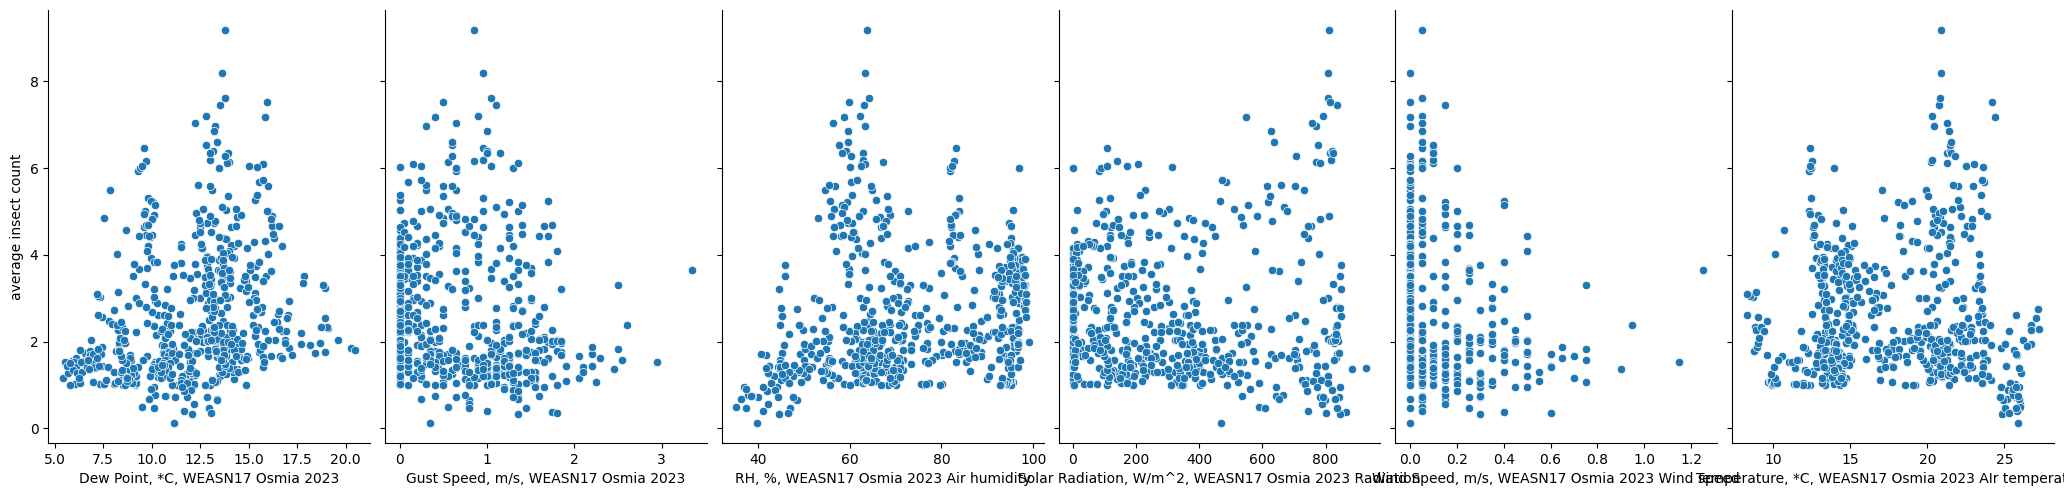

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.pairplot(df, x_vars=['Dew Point, *C, WEASN17 Osmia 2023', 'Gust Speed, m/s, WEASN17 Osmia 2023', 'RH, %, WEASN17 Osmia 2023 Air humidity', 'Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation', 'Wind Speed, m/s, WEASN17 Osmia 2023 Wind speed', 'Temperature, *C, WEASN17 Osmia 2023 AIr temperature'], y_vars='average insect count', height=5, aspect=0.7)
plt.show()


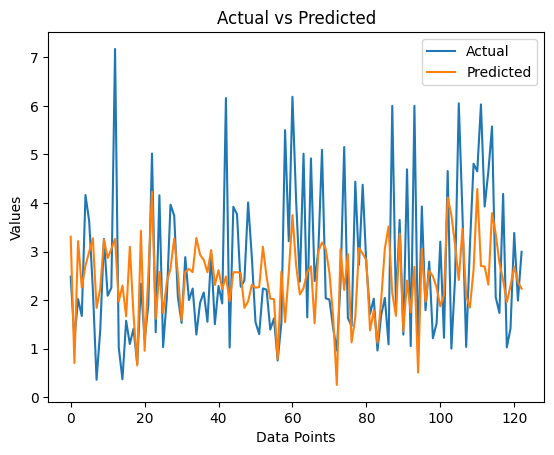

In [15]:
import matplotlib.pyplot as plt

# Assuming you have arrays of actual values (y_actual) and predicted values (y_pred)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()

plt.show()






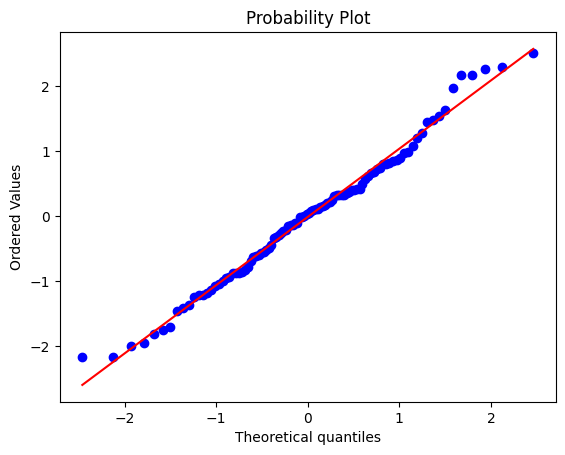

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate random data
X = np.random.normal(loc=0, scale=1, size=100)

# Generate probability plot
stats.probplot(X, dist="norm", plot=plt)
plt.show()
